## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
sns.set(style="ticks", context="talk")

## Functions

In [72]:
def join_plays(df):
    quarter = []
    down = []
    specialTeamsPlayType = []
    specialTeamsResult = []
    kickLength = []
    kickReturnYardage = []
    possessionTeam = []
    homeTeamAbbr = []
    visitorTeamAbbr = []
    for i in range(0, len(df)):
        d = df.iloc[i]
        game_id = d['gameId']
        play_id = d['playId']
        add = play_df.loc[(play_df.gameId == game_id) & (play_df.playId == play_id)]
        add_game_info = game_df.loc[game_df.gameId == game_id]
        quarter.append(add.quarter.values[0])
        down.append(add.down.values[0])
        specialTeamsPlayType.append(add.specialTeamsPlayType.values[0])
        specialTeamsResult.append(add.specialTeamsResult.values[0])
        kickLength.append(add.kickLength.values[0])
        kickReturnYardage.append(add.kickReturnYardage.values[0])
        possessionTeam.append(add.possessionTeam.values[0])
        homeTeamAbbr.append(add_game_info.homeTeamAbbr.values[0])
        visitorTeamAbbr.append(add_game_info.visitorTeamAbbr.values[0])
    df['quarter'] = quarter
    df['down'] = down
    df['specialTeamsPlayType'] = specialTeamsPlayType
    df['specialTeamsResult'] = specialTeamsResult
    df['kickLength'] = kickLength
    df['kickReturnYardage'] = kickReturnYardage
    df['possessionTeam'] = possessionTeam
    df['homeTeamAbbr'] = homeTeamAbbr
    df['visitorTeamAbbr'] = visitorTeamAbbr
    return df

In [102]:
# add receiving team
def add_return_team(df):
    return_team = []
    for i in range(0, len(df)):
        data = df.iloc[i]
        possession_team = data.possessionTeam
        home_team = data.homeTeamAbbr
        visitor_team = data.visitorTeamAbbr
        if possession_team == home_team:
            return_team.append(visitor_team)
        elif possession_team == visitor_team:
            return_team.append(home_team)
    df['returnTeam'] = return_team
    return df

In [149]:
# normalize/mirror the plays by their direction
import math

def normalize_axes(df):
    new_x = []
    new_y = []
    for i in range(0, len(df)):
        data = df.iloc[i]
        if data.playDirection == 'left':
            new_x.append(data.x)
            new_y.append(data.y)
        elif data.playDirection == 'right':
            new_x.append(math.sqrt(((120-data.x)**2)))
            new_y.append(math.sqrt(((53.3-data.y)**2)))
    df['x_new'] = new_x
    df['y_new'] = new_y
    return df

## Data

In [3]:
df_tracking = pd.read_csv('/Users/flo/Downloads/Big Data Bowl/nfl-big-data-bowl-2022/tracking2020.csv')
df_tracking.head()

time      x      y     s     a   dis       o     dir  \
0  2021-01-03T18:03:02.200  61.21  46.77  0.08  0.13  0.01  186.21  144.73   
1  2021-01-03T18:03:02.300  61.22  46.77  0.11  0.19  0.01  184.87  126.09   
2  2021-01-03T18:03:02.400  61.23  46.76  0.10  0.18  0.01  183.38  108.95   
3  2021-01-03T18:03:02.500  61.24  46.76  0.11  0.22  0.01  180.24   91.57   
4  2021-01-03T18:03:02.600  61.25  46.76  0.05  0.20  0.01  172.44  119.91   

  event    nflId   displayName  jerseyNumber position  team  frameId  \
0  None  42901.0  Dean Marlowe          31.0       SS  home        1   
1  None  42901.0  Dean Marlowe          31.0       SS  home        2   
2  None  42901.0  Dean Marlowe          31.0       SS  home        3   
3  None  42901.0  Dean Marlowe          31.0       SS  home        4   
4  None  42901.0  Dean Marlowe          31.0       SS  home        5   

       gameId  playId playDirection  
0  2021010300      40          left  
1  2021010300      40          left  
2  2021010300      40          left  
3  2021010300      40          left  
4  2021010300      40          left

In [4]:
play_df = pd.read_csv('/Users/flo/Downloads/Big Data Bowl/nfl-big-data-bowl-2022/plays.csv')
play_df.head(1)

gameId  playId                                    playDescription  \
0  2018090600      37  J.Elliott kicks 65 yards from PHI 35 to end zo...   

   quarter  down  yardsToGo possessionTeam specialTeamsPlayType  \
0        1     0          0            PHI              Kickoff   

  specialTeamsResult  kickerId returnerId  kickBlockerId yardlineSide  \
0          Touchback   44966.0        NaN            NaN          PHI   

   yardlineNumber gameClock penaltyCodes penaltyJerseyNumbers  penaltyYards  \
0              35  15:00:00          NaN                  NaN           NaN   

   preSnapHomeScore  preSnapVisitorScore passResult  kickLength  \
0                 0                    0        NaN        66.0   

   kickReturnYardage  playResult  absoluteYardlineNumber  
0                NaN          40                      45

In [71]:
game_df = pd.read_csv('/Users/flo/Downloads/Big Data Bowl/nfl-big-data-bowl-2022/games.csv')
game_df.head(1)

gameId  season  week    gameDate gameTimeEastern homeTeamAbbr  \
0  2018090600    2018     1  09/06/2018        20:20:00          PHI   

  visitorTeamAbbr  
0             ATL

## Distance Analyse bei Field Goals (Kicker zum Football)

In [73]:
# filter df on only kickers in the first frame of the play
df = df_tracking.loc[(df_tracking.frameId == 1) & ((df_tracking.position == 'K') | (df_tracking.displayName == 'football'))].copy()
df.head()

time      x      y     s     a   dis       o     dir  \
570   2021-01-03T18:03:02.200  79.75  24.21  3.78  1.46  0.37  296.46  293.70   
1254  2021-01-03T18:03:02.200  73.89  26.24  0.04  0.11  0.00     NaN     NaN   
1982  2021-01-03T18:18:17.500  51.61  21.48  0.09  0.07  0.02  231.86   52.22   
2653  2021-01-03T18:18:17.500  40.75  23.80  0.00  0.00  0.00     NaN     NaN   
3784  2021-01-03T18:21:35.000  79.70  24.25  3.72  1.70  0.36  295.77  291.55   

     event    nflId    displayName  jerseyNumber position      team  frameId  \
570   None  46298.0  Jason Sanders           7.0        K      away        1   
1254  None      NaN       football           NaN      NaN  football        1   
1982  None  46298.0  Jason Sanders           7.0        K      away        1   
2653  None      NaN       football           NaN      NaN  football        1   
3784  None  46298.0  Jason Sanders           7.0        K      away        1   

          gameId  playId playDirection  
570   2021010300      40          left  
1254  2021010300      40          left  
1982  2021010300     376          left  
2653  2021010300     376          left  
3784  2021010300     395          left

In [74]:
df = join_plays(df)
df.head()

In [75]:
df = df.loc[df.specialTeamsPlayType == 'Field Goal'].copy()
df.head(2)

time      x      y     s     a   dis       o    dir  \
1982  2021-01-03T18:18:17.500  51.61  21.48  0.09  0.07  0.02  231.86  52.22   
2653  2021-01-03T18:18:17.500  40.75  23.80  0.00  0.00  0.00     NaN    NaN   

     event    nflId    displayName  jerseyNumber position      team  frameId  \
1982  None  46298.0  Jason Sanders           7.0        K      away        1   
2653  None      NaN       football           NaN      NaN  football        1   

          gameId  playId playDirection  quarter  down specialTeamsPlayType  \
1982  2021010300     376          left        1     4           Field Goal   
2653  2021010300     376          left        1     4           Field Goal   

     specialTeamsResult  kickLength  kickReturnYardage possessionTeam  \
1982  Kick Attempt Good        49.0                NaN            MIA   
2653  Kick Attempt Good        49.0                NaN            MIA   

     homeTeamAbbr visitorTeamAbbr  
1982          BUF             MIA  
2653          BUF             MIA

In [8]:
check = df[['gameId', 'playId', 'time']].groupby(['gameId', 'playId'], as_index=False).count().sort_values('time', ascending=True)
games_to_delete = check.loc[check.time != 2][['gameId', 'playId']].values

print(len(df))
for game in games_to_delete:
    df.drop(df.loc[(df.gameId == game[0]) & (df.playId == game[1])].index, inplace=True)
print(len(df))


1718
1718


In [9]:
games = df.gameId.unique()
dist = []
for game in games:
    plays = df.loc[df.gameId == game]['playId'].unique()
    for play in plays:
        data = df.loc[(df.gameId == game) & (df.playId == play)]
        p_kicker = data.loc[data.position == 'K'][['x', 'y']].values
        p_football = data.loc[data.displayName == 'football'][['x', 'y']].values
        eucledian_dist = np.linalg.norm(p_kicker-p_football)
        dist.append(eucledian_dist)
        dist.append(eucledian_dist)
        
df['distance'] = dist
df.head(2)

time      x      y     s     a   dis       o    dir  \
1982  2021-01-03T18:18:17.500  51.61  21.48  0.09  0.07  0.02  231.86  52.22   
2653  2021-01-03T18:18:17.500  40.75  23.80  0.00  0.00  0.00     NaN    NaN   

     event    nflId    displayName  jerseyNumber position      team  frameId  \
1982  None  46298.0  Jason Sanders           7.0        K      away        1   
2653  None      NaN       football           NaN      NaN  football        1   

          gameId  playId playDirection  quarter  down specialTeamsPlayType  \
1982  2021010300     376          left        1     4           Field Goal   
2653  2021010300     376          left        1     4           Field Goal   

     specialTeamsResult  kickLength   distance  
1982  Kick Attempt Good        49.0  11.105044  
2653  Kick Attempt Good        49.0  11.105044

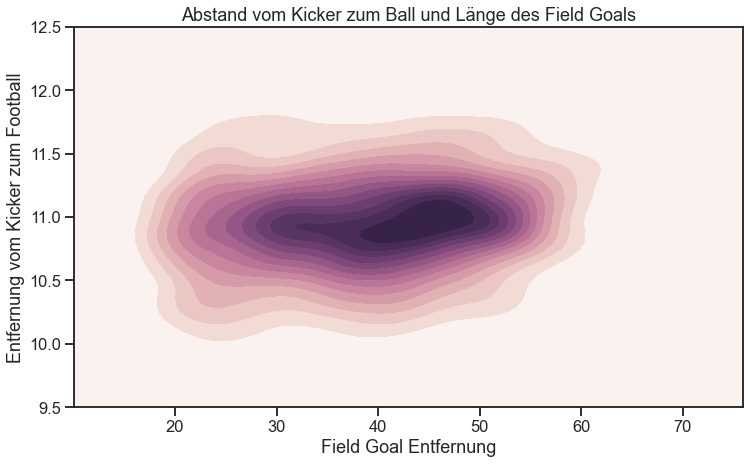

In [10]:
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
plt.figure(figsize=(12,7))
sns.kdeplot(
        x='kickLength', y='distance',
        cmap=cmap, 
        fill=True,
        thresh=0, levels=15,
        data=df
    )
plt.ylim(9.5, 12.5)
plt.title("Abstand vom Kicker zum Ball und Länge des Field Goals")
plt.ylabel("Entfernung vom Kicker zum Football")
plt.xlabel("Field Goal Entfernung")
plt.show()

## Darstellung des Plays

In [76]:
# filter df on only kickers in the first frame of the play
df = df_tracking.loc[((df_tracking.position == 'K') | (df_tracking.displayName == 'football'))].copy()
df.head()

time      x      y     s     a   dis       o     dir  \
570  2021-01-03T18:03:02.200  79.75  24.21  3.78  1.46  0.37  296.46  293.70   
571  2021-01-03T18:03:02.300  79.40  24.37  3.94  1.09  0.39  293.55  294.36   
572  2021-01-03T18:03:02.400  79.02  24.53  4.12  0.90  0.41  293.55  292.99   
573  2021-01-03T18:03:02.500  78.62  24.69  4.30  0.78  0.43  292.95  292.32   
574  2021-01-03T18:03:02.600  78.19  24.85  4.53  1.02  0.46  289.98  289.97   

    event    nflId    displayName  jerseyNumber position  team  frameId  \
570  None  46298.0  Jason Sanders           7.0        K  away        1   
571  None  46298.0  Jason Sanders           7.0        K  away        2   
572  None  46298.0  Jason Sanders           7.0        K  away        3   
573  None  46298.0  Jason Sanders           7.0        K  away        4   
574  None  46298.0  Jason Sanders           7.0        K  away        5   

         gameId  playId playDirection  
570  2021010300      40          left  
571  2021010300      40          left  
572  2021010300      40          left  
573  2021010300      40          left  
574  2021010300      40          left

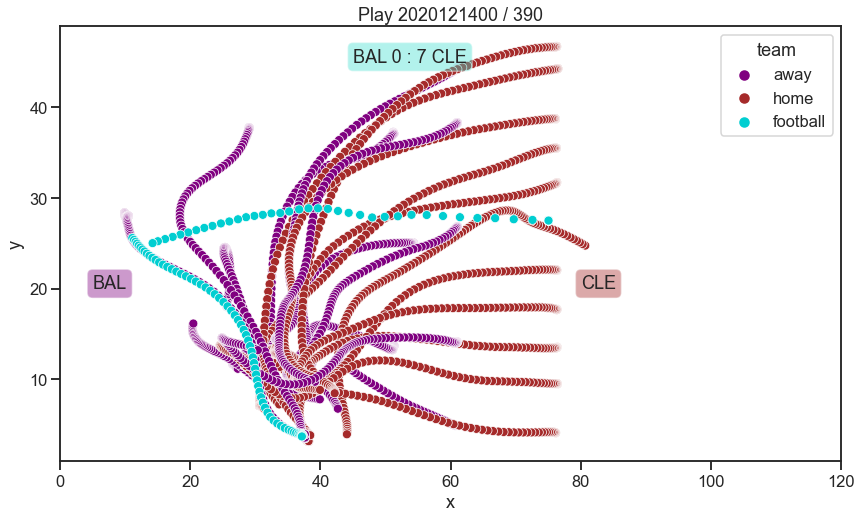

In [96]:
game_id = 2020121400 # input 1
play_id = 390 # input 2
sub_df = df_tracking.loc[(df_tracking.gameId == game_id) & (df_tracking.playId == play_id)]

pal = ['purple', 'brown', 'darkturquoise']
play_df_sub = play_df.loc[(play_df.gameId == game_id) & (play_df.playId == play_id)]
game_df_sub = game_df.loc[(game_df.gameId == game_id)]

plt.figure(figsize=(14,8))
sns.scatterplot(x='x', y='y', data=sub_df, hue='team', palette=pal)
plt.text(80, 20, f"{game_df_sub.homeTeamAbbr.values[0]}", \
    bbox=dict(boxstyle='round', \
    facecolor='brown', alpha=0.4))

plt.text(5, 20, f"{game_df_sub.visitorTeamAbbr.values[0]}", \
    bbox=dict(boxstyle='round', \
    facecolor='purple', alpha=0.4))

plt.text(45, 45, f"{game_df_sub.visitorTeamAbbr.values[0]} {play_df_sub.preSnapVisitorScore.values[0]} : {play_df_sub.preSnapHomeScore.values[0]} {game_df_sub.homeTeamAbbr.values[0]}", \
    bbox=dict(boxstyle='round', \
    facecolor='turquoise', alpha=0.4))
plt.title(f"Play {game_id} / {play_id}")
plt.xlim(0,120)
plt.show()

<AxesSubplot:xlabel='x', ylabel='Density'>

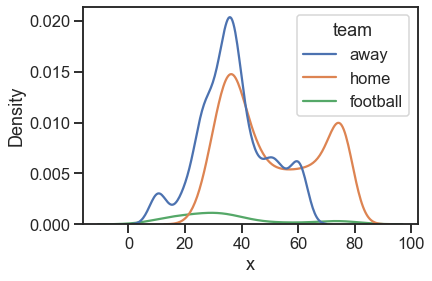

In [95]:
sns.kdeplot(data=sub_df, x='x', hue='team')

<AxesSubplot:xlabel='time', ylabel='s'>

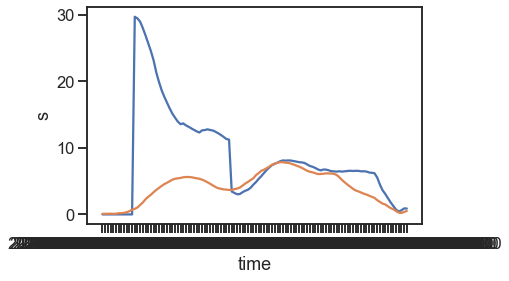

In [40]:
sns.lineplot(x='time', y='s', data=sub_df.loc[sub_df.team == 'football'])
sns.lineplot(x='time', y='s', data=sub_df.loc[sub_df.position == 'RB'])

In [97]:
sub_df.x.describe()

count    2622.000000
mean       43.531785
std        16.311822
min         9.900000
25%        32.517500
50%        38.350000
75%        54.335000
max        80.680000
Name: x, dtype: float64

## Kick Receive Analyse (tackle vs. received)

In [150]:
# filter df on only kickers in the first frame of the play
df = df_tracking.loc[(df_tracking.team == 'football') & ((df_tracking.event == 'kick_received') | (df_tracking.event == 'tackle'))].copy()
df.head()

time      x      y     s     a   dis   o  dir  \
5123   2021-01-03T18:21:40.500   7.75  21.64  4.24  0.34  0.41 NaN  NaN   
5165   2021-01-03T18:21:44.700  34.25  12.17  1.79  5.90  0.19 NaN  NaN   
53521  2021-01-03T20:52:24.500  18.29   3.22  1.77  4.57  0.20 NaN  NaN   
61354  2021-01-03T21:09:09.300  62.77  51.69  1.72  3.29  0.19 NaN  NaN   
65586  2021-01-03T21:28:09.100  52.16  30.36  0.84  2.25  0.03 NaN  NaN   

               event  nflId displayName  jerseyNumber position      team  \
5123   kick_received    NaN    football           NaN      NaN  football   
5165          tackle    NaN    football           NaN      NaN  football   
53521  kick_received    NaN    football           NaN      NaN  football   
61354         tackle    NaN    football           NaN      NaN  football   
65586         tackle    NaN    football           NaN      NaN  football   

       frameId      gameId  playId playDirection  
5123        56  2021010300     395          left  
5165        98  2021010300     395          left  
53521       64  2021010300    3930          left  
61354       37  2021010300    4494          left  
65586      114  2021010301     116         right

In [151]:
df = join_plays(df)
df = add_return_team(df)
df = normalize_axes(df)
df.head()

time      x      y     s     a   dis   o  dir  \
5123   2021-01-03T18:21:40.500   7.75  21.64  4.24  0.34  0.41 NaN  NaN   
5165   2021-01-03T18:21:44.700  34.25  12.17  1.79  5.90  0.19 NaN  NaN   
53521  2021-01-03T20:52:24.500  18.29   3.22  1.77  4.57  0.20 NaN  NaN   
61354  2021-01-03T21:09:09.300  62.77  51.69  1.72  3.29  0.19 NaN  NaN   
65586  2021-01-03T21:28:09.100  52.16  30.36  0.84  2.25  0.03 NaN  NaN   

               event  nflId displayName  jerseyNumber position      team  \
5123   kick_received    NaN    football           NaN      NaN  football   
5165          tackle    NaN    football           NaN      NaN  football   
53521  kick_received    NaN    football           NaN      NaN  football   
61354         tackle    NaN    football           NaN      NaN  football   
65586         tackle    NaN    football           NaN      NaN  football   

       frameId      gameId  playId playDirection  quarter  down  \
5123        56  2021010300     395          left        1     0   
5165        98  2021010300     395          left        1     0   
53521       64  2021010300    3930          left        4     0   
61354       37  2021010300    4494          left        4     0   
65586      114  2021010301     116         right        1     4   

      specialTeamsPlayType specialTeamsResult  kickLength  kickReturnYardage  \
5123               Kickoff             Return        68.0               27.0   
5165               Kickoff             Return        68.0               27.0   
53521              Kickoff             Return        58.0                5.0   
61354              Kickoff             Return        12.0                0.0   
65586                 Punt             Return        39.0               10.0   

      possessionTeam homeTeamAbbr visitorTeamAbbr returnTeam  x_new  y_new  
5123             MIA          BUF             MIA        BUF   7.75  21.64  
5165             MIA          BUF             MIA        BUF  34.25  12.17  
53521            MIA          BUF             MIA        BUF  18.29   3.22  
61354            MIA          BUF             MIA        BUF  62.77  51.69  
65586            CAR          CAR              NO         NO  67.84  22.94

In [153]:
# wer hat das beste return Team
df[['returnTeam', 'kickReturnYardage']].groupby(['returnTeam'], as_index=False).median().sort_values('kickReturnYardage', ascending=False)

returnTeam  kickReturnYardage
10        DET               23.0
13        IND               22.0
8         DAL               21.0
31        WAS               20.0
3         BUF               20.0
4         CAR               20.0
5         CHI               20.0
23        NYG               20.0
9         DEN               20.0
21         NE               20.0
12        HOU               20.0
20        MIN               20.0
15         KC               19.0
27        SEA               18.0
22         NO               18.0
0         ARI               18.0
14        JAX               18.0
6         CIN               18.0
2         BAL               18.0
11         GB               17.5
1         ATL               17.0
7         CLE               17.0
24        NYJ               17.0
25        PHI               17.0
29         TB               17.0
30        TEN               17.0
16         LA               17.0
17        LAC               16.0
18         LV               16.0
28         SF               16.0
26        PIT               15.0
19        MIA               13.0

<AxesSubplot:xlabel='x_new', ylabel='y_new'>

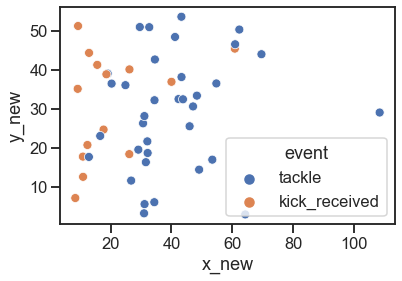

In [128]:
return_team = 'MIA'
sns.scatterplot(x='x_new', y='y_new', data=df.loc[(df.returnTeam == return_team)], hue='event')

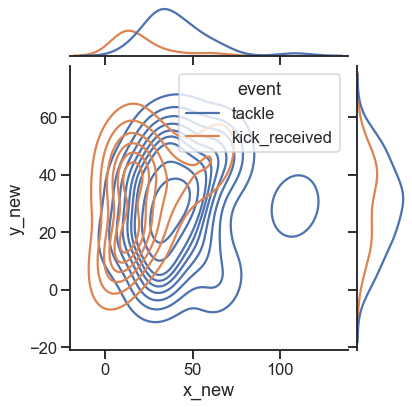

In [136]:
sns.jointplot(
    data=df.loc[(df.returnTeam == 'MIA')],
    x="x_new", y="y_new",
    kind="kde",
    hue='event'
)

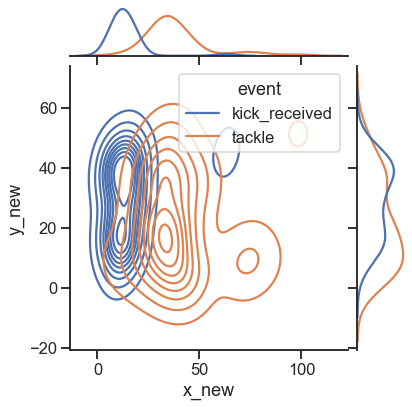

In [141]:
sns.jointplot(
    data=df.loc[(df.returnTeam == 'DAL')],
    x="x_new", y="y_new",
    kind="kde",
    hue='event'
)

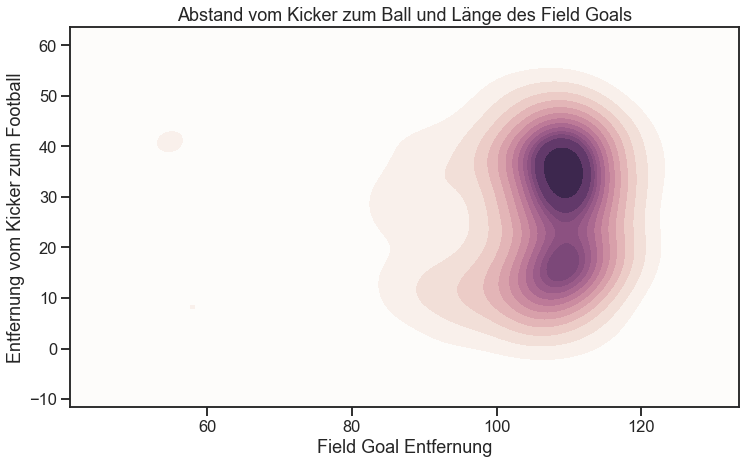

In [62]:
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
plt.figure(figsize=(12,7))
sns.kdeplot(
        x='x', y='y',
        cmap=cmap, 
        fill=True,
        thresh=0, levels=15,
        data=df.loc[(df.playDirection == 'right') & (df.event == 'kick_received')]
    )
# plt.ylim(9.5, 12.5)
plt.title("Abstand vom Kicker zum Ball und Länge des Field Goals")
plt.ylabel("Entfernung vom Kicker zum Football")
plt.xlabel("Field Goal Entfernung")
plt.show()

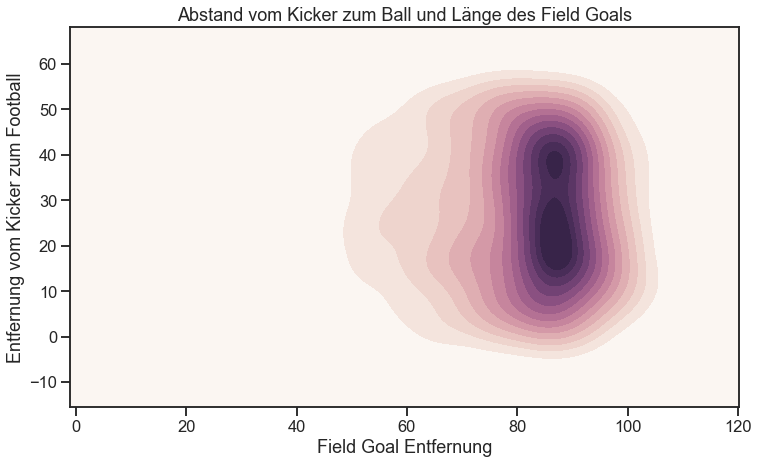

In [63]:
cmap = sns.cubehelix_palette(start=0, light=1, as_cmap=True)
plt.figure(figsize=(12,7))
sns.kdeplot(
        x='x', y='y',
        cmap=cmap, 
        fill=True,
        thresh=0, levels=15,
        data=df.loc[(df.playDirection == 'right') & (df.event == 'tackle')]
    )
# plt.ylim(9.5, 12.5)
plt.title("Abstand vom Kicker zum Ball und Länge des Field Goals")
plt.ylabel("Entfernung vom Kicker zum Football")
plt.xlabel("Field Goal Entfernung")
plt.show()

In [64]:
# abstand von received zu tackle - welche Teams performen hierbei am besten?

In [ ]:
# speed of ball carrier

## Wer hat den besten Kicker?

In [167]:
# filter df on only kickers in the first frame of the play
df = df_tracking.loc[(df_tracking.team == 'football')].copy()
df.head()
# play_df.specialTeamsResult.unique()

time      x      y     s     a   dis   o  dir event  \
1254  2021-01-03T18:03:02.200  73.89  26.24  0.04  0.11  0.00 NaN  NaN  None   
1255  2021-01-03T18:03:02.300  73.85  26.21  0.03  0.09  0.05 NaN  NaN  None   
1256  2021-01-03T18:03:02.400  73.84  26.21  0.02  0.07  0.00 NaN  NaN  None   
1257  2021-01-03T18:03:02.500  74.03  26.31  0.01  0.02  0.21 NaN  NaN  None   
1258  2021-01-03T18:03:02.600  74.44  26.42  0.05  0.04  0.43 NaN  NaN  None   

      nflId displayName  jerseyNumber position      team  frameId      gameId  \
1254    NaN    football           NaN      NaN  football        1  2021010300   
1255    NaN    football           NaN      NaN  football        2  2021010300   
1256    NaN    football           NaN      NaN  football        3  2021010300   
1257    NaN    football           NaN      NaN  football        4  2021010300   
1258    NaN    football           NaN      NaN  football        5  2021010300   

      playId playDirection  
1254      40          left  
1255      40          left  
1256      40          left  
1257      40          left  
1258      40          left

In [172]:
df['game_play_id'] = df.gameId.astype(str) + '_' + df.playId.astype(str)
play_df['game_play_id'] = play_df.gameId.astype(str) + '_' + play_df.playId.astype(str)
play_df.head()

gameId  playId                                    playDescription  \
0  2018090600      37  J.Elliott kicks 65 yards from PHI 35 to end zo...   
1  2018090600     366  (9:20) C.Johnston punts 56 yards to ATL 36, Ce...   
2  2018090600     658  (5:03) M.Bryant 21 yard field goal is GOOD, Ce...   
3  2018090600     677  M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...   
4  2018090600     872  (:33) C.Johnston punts 65 yards to end zone, C...   

   quarter  down  yardsToGo possessionTeam specialTeamsPlayType  \
0        1     0          0            PHI              Kickoff   
1        1     4          4            PHI                 Punt   
2        1     4          3            ATL           Field Goal   
3        1     0          0            ATL              Kickoff   
4        1     4         18            PHI                 Punt   

  specialTeamsResult  kickerId returnerId  kickBlockerId yardlineSide  \
0          Touchback   44966.0        NaN            NaN          PHI   
1             Return   45603.0      42450            NaN          PHI   
2  Kick Attempt Good   27091.0        NaN            NaN          PHI   
3             Return   37267.0      44979            NaN          ATL   
4          Touchback   45603.0        NaN            NaN          PHI   

   yardlineNumber gameClock penaltyCodes penaltyJerseyNumbers  penaltyYards  \
0              35  15:00:00          NaN                  NaN           NaN   
1               8  09:20:00         UNSd               PHI 18         -15.0   
2               3  05:03:00          NaN                  NaN           NaN   
3              35  05:01:00          NaN                  NaN           NaN   
4              35  00:33:00          NaN                  NaN           NaN   

   preSnapHomeScore  preSnapVisitorScore passResult  kickLength  \
0                 0                    0        NaN        66.0   
1                 0                    0        NaN        56.0   
2                 0                    0        NaN        21.0   
3                 0                    3        NaN        64.0   
4                 0                    3        NaN        65.0   

   kickReturnYardage  playResult  absoluteYardlineNumber    game_play_id  
0                NaN          40                      45   2018090600_37  
1                5.0          36                      18  2018090600_366  
2                NaN           0                      13  2018090600_658  
3               30.0          34                      75  2018090600_677  
4                NaN          45                      45  2018090600_872

In [175]:
# filter plays
filtered_plays = play_df.loc[
    (play_df.specialTeamsResult == 'Return') | 
    (play_df.specialTeamsResult == 'Fair Catch') | 
    (play_df.specialTeamsResult == 'Downed') | 
    (play_df.specialTeamsResult == 'Out of Bounds')
].game_play_id.values
filtered_plays[:5]

array(['2018090600_366', '2018090600_677', '2018090600_973',
       '2018090600_1606', '2018090600_1850'], dtype=object)

In [176]:
df = df[df.game_play_id.isin(filtered_plays)]
df.sample()

time      x      y     s     a   dis   o  dir  \
4376046  2020-12-01T01:18:57.100  58.44  24.65  10.9  5.43  1.18 NaN  NaN   

        event  nflId displayName  jerseyNumber position      team  frameId  \
4376046  None    NaN    football           NaN      NaN  football       53   

             gameId  playId playDirection    game_play_id  
4376046  2020113000     151         right  2020113000_151

In [178]:
df = join_plays(df)
print("join_plays done")
df = add_return_team(df)
print("add_return_team done")
df = normalize_axes(df)
print("normalize_axes done")
df.head()

join_plays done
add_return_team done
normalize_axes done


time      x     y    s    a   dis   o  dir event  \
5068  2021-01-03T18:21:35.000  73.83  26.2  0.0  0.0  0.00 NaN  NaN  None   
5069  2021-01-03T18:21:35.100  73.84  26.2  0.0  0.0  0.00 NaN  NaN  None   
5070  2021-01-03T18:21:35.200  73.84  26.2  0.0  0.0  0.00 NaN  NaN  None   
5071  2021-01-03T18:21:35.300  73.84  26.2  0.0  0.0  0.00 NaN  NaN  None   
5072  2021-01-03T18:21:35.400  73.85  26.2  0.0  0.0  0.01 NaN  NaN  None   

      nflId displayName  jerseyNumber position      team  frameId      gameId  \
5068    NaN    football           NaN      NaN  football        1  2021010300   
5069    NaN    football           NaN      NaN  football        2  2021010300   
5070    NaN    football           NaN      NaN  football        3  2021010300   
5071    NaN    football           NaN      NaN  football        4  2021010300   
5072    NaN    football           NaN      NaN  football        5  2021010300   

      playId playDirection    game_play_id  quarter  down  \
5068     395          left  2021010300_395        1     0   
5069     395          left  2021010300_395        1     0   
5070     395          left  2021010300_395        1     0   
5071     395          left  2021010300_395        1     0   
5072     395          left  2021010300_395        1     0   

     specialTeamsPlayType specialTeamsResult  kickLength  kickReturnYardage  \
5068              Kickoff             Return        68.0               27.0   
5069              Kickoff             Return        68.0               27.0   
5070              Kickoff             Return        68.0               27.0   
5071              Kickoff             Return        68.0               27.0   
5072              Kickoff             Return        68.0               27.0   

     possessionTeam homeTeamAbbr visitorTeamAbbr returnTeam  x_new  y_new  
5068            MIA          BUF             MIA        BUF  73.83   26.2  
5069            MIA          BUF             MIA        BUF  73.84   26.2  
5070            MIA          BUF             MIA        BUF  73.84   26.2  
5071            MIA          BUF             MIA        BUF  73.84   26.2  
5072            MIA          BUF             MIA        BUF  73.85   26.2

In [190]:
df.sample()

time       x      y     s    a   dis   o  dir  \
8329261  2020-10-19T22:38:51.500  109.22  30.72  4.73  0.4  0.48 NaN  NaN   

        event  nflId displayName  jerseyNumber position      team  frameId  \
8329261  None    NaN    football           NaN      NaN  football       58   

             gameId  playId playDirection     game_play_id  quarter  down  \
8329261  2020101901    2097         right  2020101901_2097        3     0   

        specialTeamsPlayType specialTeamsResult  kickLength  \
8329261              Kickoff             Return        67.0   

         kickReturnYardage possessionTeam homeTeamAbbr visitorTeamAbbr  \
8329261               22.0            BUF          BUF              KC   

        returnTeam  x_new  y_new  
8329261         KC  10.78  22.58

In [214]:
# df.sample(15)
# sns.scatterplot(x='x_new', y='y_new', data=df.loc[df.game_play_id == '2020101200_2425'], hue='frameId')
all_game_play_ids = list(df.game_play_id.unique())
filtered_index = []
return_index = []
for id_ in all_game_play_ids:
    sdf = df.loc[df.game_play_id == id_]
    if sdf.specialTeamsResult.values[0] != 'Return':
        max_frame_id = sdf.frameId.max()
        filtered_index.append(sdf[sdf.frameId == sdf.frameId.max()].index[0])
    elif sdf.specialTeamsResult.values[0] == 'Return':
        return_event = sdf[sdf.event == 'kick_received']
        if len(return_event['event'].index) > 0:
            return_index.append(return_event['event'].index[0])

combined = return_index + filtered_index

[5123, 53521, 91762, 106236, 112052, 115409, 118762, 122014, 124861, 141368, 147520, 197525, 200995, 207829, 210538, 215916, 219498, 224328, 241787, 248207, 254980, 258998, 262505, 267431, 277480, 283912, 293138, 295259, 297686, 305524, 308872, 312547, 316943, 320965, 335851, 342874, 355176, 361249, 367433, 370980, 376695, 394095, 400748, 414458, 438687, 466633, 469955, 473179, 500056, 544005, 562009, 568291, 586090, 590891, 601397, 613444, 621642, 636337, 665159, 678431, 689030, 691638, 736525, 753529, 769962, 788667, 794084, 802798, 807398, 834499, 850135, 853547, 864516, 866995, 883380, 885407, 896303, 964274, 967376, 970647, 978067, 981578, 985988, 997243, 1001299, 1007113, 1015289, 1024205, 1036949, 1049025, 1061296, 1063531, 1070020, 1079445, 1087168, 1093451, 1101580, 1105055, 1149388, 1153188, 1162394, 1164717, 1169527, 1174756, 1184837, 1187362, 1197961, 1227720, 1252208, 1258696, 1267713, 1277444, 1284381, 1288127, 1294713, 1300588, 1306681, 1322612, 1334247, 1345758, 1347957

In [215]:
df_special = df.loc[combined]
df_special.to_csv('kicker_analysis.csv')
df_special.head()

time       x      y     s      a   dis   o  dir  \
5123    2021-01-03T18:21:40.500    7.75  21.64  4.24   0.34  0.41 NaN  NaN   
53521   2021-01-03T20:52:24.500   18.29   3.22  1.77   4.57  0.20 NaN  NaN   
91762   2021-01-03T23:31:33.300    8.20  20.39  4.32  10.53  0.49 NaN  NaN   
106236  2021-01-03T21:44:57.800    9.17  13.26  9.54   5.84  0.99 NaN  NaN   
112052  2021-01-03T22:12:33.300  108.16  11.70  8.95   3.35  0.74 NaN  NaN   

                event  nflId displayName  jerseyNumber position      team  \
5123    kick_received    NaN    football           NaN      NaN  football   
53521   kick_received    NaN    football           NaN      NaN  football   
91762   kick_received    NaN    football           NaN      NaN  football   
106236  kick_received    NaN    football           NaN      NaN  football   
112052  kick_received    NaN    football           NaN      NaN  football   

        frameId      gameId  playId playDirection     game_play_id  quarter  \
5123         56  2021010300     395          left   2021010300_395        1   
53521        64  2021010300    3930          left  2021010300_3930        4   
91762        43  2021010301    2708          left  2021010301_2708        3   
106236       45  2021010302     461          left   2021010302_461        1   
112052       55  2021010302    1103         right  2021010302_1103        2   

        down specialTeamsPlayType specialTeamsResult  kickLength  \
5123       0              Kickoff             Return        68.0   
53521      0              Kickoff             Return        58.0   
91762      0              Kickoff             Return        68.0   
106236     0              Kickoff             Return        65.0   
112052     0              Kickoff             Return        64.0   

        kickReturnYardage possessionTeam homeTeamAbbr visitorTeamAbbr  \
5123                 27.0            MIA          BUF             MIA   
53521                 5.0            MIA          BUF             MIA   
91762                21.0             NO          CAR              NO   
106236               20.0            CHI          CHI              GB   
112052               21.0            CHI          CHI              GB   

       returnTeam  x_new  y_new  
5123          BUF   7.75  21.64  
53521         BUF  18.29   3.22  
91762         CAR   8.20  20.39  
106236         GB   9.17  13.26  
112052         GB  11.84  41.60

possessionTeam   x_new   y_new
0             ARI  15.640  26.350
1             ATL  14.395  32.135
2             BAL  17.330  16.170
3             BUF  15.980  19.920
4             CAR  23.365  25.095
5             CHI  18.145  13.780
6             CIN  25.095  30.655
7             CLE  15.350  21.870
8             DAL  21.720  16.260
9             DEN  24.785  29.870
10            DET  16.610  31.160
11             GB  15.310  27.915
12            HOU  18.810  22.960
13            IND  14.815  16.080
14            JAX  24.630  28.535
15             KC  18.230  21.240
16             LA  15.890  26.090
17            LAC  14.925  23.425
18             LV  16.920  17.250
19            MIA  21.790  20.360
20            MIN  22.100  24.875
21             NE  15.850  32.675
22             NO  23.920  32.880
23            NYG  19.090  30.695
24            NYJ  23.960  18.640
25            PHI  17.120  20.040
26            PIT  19.370  24.760
27            SEA  14.210  12.640
28             SF  19.360  26.920
29             TB  22.100  21.680
30            TEN  15.570  34.045
31            WAS  26.520  26.155

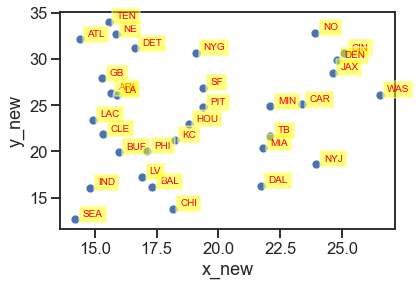

In [232]:
team_grouped = df_special[['possessionTeam', 'specialTeamsPlayType', 'x_new', 'y_new']].groupby(['possessionTeam'], as_index=False).median().sort_values('possessionTeam', ascending=True)
sns.scatterplot(data=team_grouped, x='x_new', y='y_new')
for i in range(0, len(team_grouped)):
    plt.text(x=team_grouped.iloc[i].x_new+0.3,y=team_grouped.iloc[i].y_new+0.3,s=team_grouped.possessionTeam[i], fontdict=dict(color='red',size=10), bbox=dict(facecolor='yellow',alpha=0.5))